# RNN LSTM Model trained on 2 years of price history and /r/Binance Posts

> In this notebook I will be repeating the modeling process but instead using the Binance subreddit and Binance Coin Price history. Using the Keras library, I'll be combing Dense, Dropout, and LSTM layers to model on top of my price and sentiment data

## Imports and data clarity

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(222) #The random seed I chose was basically button mash - it has no broader meaning.

Using TensorFlow backend.


In [3]:
df = pd.read_csv('/Users/zoenawar/DSI/RNN_LSTM_Cryptocurrency_Project/datasets/binance_modeling_dataset.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Target,compound,neg,neu,pos
0,2017-07-26,-0.080814,-0.058943,-0.022308,-0.006914,1,0.2202,0.0,0.9635,0.0365
1,2017-07-27,-0.007413,-0.004898,0.016340,0.024720,2,0.0000,0.0,1.0000,0.0000
2,2017-07-28,0.024013,0.004978,0.005799,-0.034064,0,0.2732,0.0,0.9050,0.0950
3,2017-07-29,-0.026479,0.020593,-0.003597,0.035977,2,NaN,NaN,NaN,NaN
4,2017-07-30,0.030091,-0.028095,0.020315,-0.012958,0,0.7264,0.0,0.8210,0.1790


In [5]:
df.tail()

,Date,Open,High,Low,Close,Target,compound,neg,neu,pos
653,2019-05-10,-0.093976,-0.042125,-0.010182,0.040892,2,0.243868,0.023105,0.870421,0.106579
654,2019-05-11,0.042553,0.096452,0.033027,0.073980,2,0.044443,0.035619,0.889905,0.074476
655,2019-05-12,0.075510,-0.021422,0.065514,-0.010451,0,0.066800,0.045810,0.886143,0.068048
656,2019-05-13,-0.011860,0.142524,0.020659,0.143063,2,0.187018,0.030359,0.861000,0.108590
657,2019-05-14,0.146904,-0.002038,0.105542,-0.007560,1,-0.032452,0.053212,0.909909,0.036879


In [6]:
df.shape

(658, 10)

In [7]:
df.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Target        int64
compound    float64
neg         float64
neu         float64
pos         float64
dtype: object

In [8]:
df.set_index('Date', inplace=True) #Making sure the index is datetime.


# Model Preperation
> In the following lines, I will be organizing, scaling, and splitting the data to prepare it for the model.

In [9]:
# Setting my x and y to all the non-target features and target respectively 
features = [col for col in df.columns if not col == 'Target']
X = df[features]
y = df[['Target']].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)  # Train test splitting
X_train.head()

,Open,High,Low,Close,compound,neg,neu,pos
Date,,,,,,,,
2017-07-26,-0.080814,-0.058943,-0.022308,-0.006914,0.2202,0.0,0.9635,0.0365
2017-07-27,-0.007413,-0.004898,0.016340,0.024720,0.0000,0.0,1.0000,0.0000
2017-07-28,0.024013,0.004978,0.005799,-0.034064,0.2732,0.0,0.9050,0.0950
2017-07-29,-0.026479,0.020593,-0.003597,0.035977,NaN,NaN,NaN,NaN
2017-07-30,0.030091,-0.028095,0.020315,-0.012958,0.7264,0.0,0.8210,0.1790


In [11]:
# Our data works on multiple scales, so it's neccessary to scale it before feeding it into the model
ss = StandardScaler()
X_train_sc = ss.fit_transform(np.nan_to_num(X_train))
X_test_sc = ss.transform(np.nan_to_num(X_test))

In [12]:
#generation of training sequences
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=3, batch_size=64)

In [13]:
batch_x, batch_y = train_sequences[0]

In [14]:
batch_x.shape

(64, 3, 8)

In [15]:
batch_y.shape

(64, 1)

In [16]:
pd.DataFrame(X_train_sc, columns=X_train.columns).head(3)

,Open,High,Low,Close,compound,neg,neu,pos
0,-0.867784,-0.647655,-0.344527,-0.184693,1.079492,-1.429502,0.726661,-0.894413
1,-0.188246,-0.160198,0.032390,0.110111,-0.917340,-1.429502,0.857583,-1.647705
2,0.102698,-0.071117,-0.070415,-0.437712,1.560111,-1.429502,0.516827,0.312918


In [17]:
#generation of test sequences
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size=64)

# Model building and compiling

> In the following lines I set out the many layers in my model, using LSTM, dropout, and Dense layers to train my model. Then I compile the model and record the history for analysis.

In [18]:
model = Sequential()
model.add(LSTM(8, input_shape=(3, 8), return_sequences=True))

model.add(LSTM(8))

model.add(Dense(6, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(4, activation='relu'))

model.add(Dropout(0.2))


model.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.compile(optimizer=Adam(lr=.0007), loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit_generator(train_sequences, validation_data=test_sequences, epochs=100, verbose=0)

Instructions for updating:
Use tf.cast instead.


# Checking out the model

> In the following section I take a look at the Loss scores and Accuracy of the model as it trains

In [20]:
# history.history['loss']

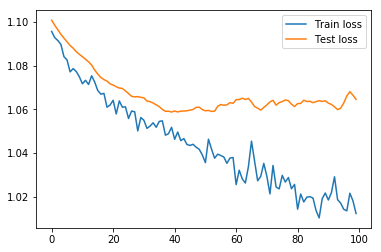

In [21]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

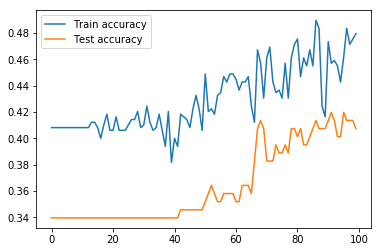

In [22]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();

In [23]:
df.Target.value_counts(normalize=True) # The baseline is .41 as that's the dominant class

2    0.419453
0    0.390578
1    0.189970
Name: Target, dtype: float64

# Conclusions

This model doesn't perform quite as well as my bitcoin model, but I think that has a lot to do with the lack of data. Everything I mentioned in the Bitcoin RNN LSTM notebook holds true here for the most part.